In [1]:
import tweepy
import json
CONSUMER_KEY = 'zKN3c1kLLFfKX56QcvtSGUleB'
CONSUMER_SECRET = 'jSftC7tlayrdJinJ9YQBHtrOfkWmgjQ08bmPGrYuKwlFkjz6Ru'
OAUTH_TOKEN = '850720276308385792-OReYp3sYnVwgKqquSUMgKV0fkPeUNrh'
OAUTH_SECRET = 'OVAkNb5jCDRrmkef5WbLnKSAzScIcuyOwMCg3b7oU1qau'
auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN,OAUTH_SECRET)
api = tweepy.API(auth)
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [ ]:
#Note:- Running these functions will give a different output every time as we are dealing with API’s

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
type(api)

tweepy.api.API

In [4]:
#handle rate limiting
import time
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError as error:
            print('RateLimitError')
            print(error)
            time.sleep(60 * 5)
        except tweepy.TweepError as error:
            print('tweepy.TweepError')
            print(error)
            time.sleep(60 * 5) 

In [5]:
#Twitter Search helper function
def simple_search(api, query, max_results=20000):
  # the first search initializes a cursor, stored in the metadata results,
  #   that allows next searches to return additional tweets
    search_results = [status for status in limit_handled(tweepy.Cursor(api.search, q=query).items(max_results))]
  
  # for each tweet, get the json representation
    tweets = [tweet._json for tweet in search_results]
    return tweets

In [6]:
#tweet toeknizer object from nltk
ttokenizer = nltk.tokenize.TweetTokenizer()

In [7]:
#stopwords from nltk stopwords corpus 
stopwords = nltk.corpus.stopwords.words('english')

In [8]:
#filter to remove symbols 
def alpha_filter(w):
    pattern=re.compile('^[^a-z]+$')
    if (pattern.match(w)):
        return True
    else:
        return False

In [9]:
#Helper function for text processing for tweets 
def text_processing(text):
    stopwords = nltk.corpus.stopwords.words('english')
    l1=[]
    for tweet in text:
        l2=[]
        for token in tweet:
            #removes stopwords
            if token not in stopwords:
                l2.append(token)
                #removes single characters based on regex 
                l2=[token for token in l2 if not alpha_filter(token)]
                #removes all links
                l2=[token for token in l2 if not token.startswith('http')]       
        l1.append(" ".join(l2)) 
        #returns a list of strings, each string is the processed tweet
    return l1

In [10]:
#Helper function to get sentiment using textblob
def get_sentiment(text_list):
    '''Takes a list of strings and return'''
    sent_list=[]
    for i in text_list:
        analysis = TextBlob(i)
        if analysis.sentiment[0]>0:
            sent_list.append("Positive")
        elif analysis.sentiment[0]<0:
            sent_list.append("Negative")
        else:
            sent_list.append("Neutral")
    return sent_list


In [11]:
# helper function to get vader sentiment
def get_sentiment_vader(text_list):
    '''Takes a list of strings and return a tuple of lists containing sentiment and sentiment scores'''
    #list for sentiment as derived from vader compound scores 
    sent_list=[]
    #list of raw sentiment scores as derved from vader
    scores=[]
    for i in text_list:
        analyser = SentimentIntensityAnalyzer()
        vader=analyser.polarity_scores(i)
        if vader['compound']>0.05:
            sent_list.append("Positive")
            scores.append(vader['compound'])
        elif vader['compound']<-0.05:
            sent_list.append("Negative")
            scores.append(vader['compound'])
        else:
            sent_list.append("Neutral")
            scores.append(vader['compound'])
    return (sent_list,scores)


In [12]:
#Calculate the sentiment for the tweets in a stock and returns a dataframe 
def get_tweet_df(tweetlist):
    '''Takes a list of dict(json) as obtained form the twitter serach helper function  and returns a data frame with processed text and sentiment'''
    '''Uses the helper functions to process the text and get sentiment'''
    #create a dataframe to store the tweets 
    df=pd.DataFrame()
    df["date"]=[i["created_at"] for i in tweetlist]
    df["lang"]=[i["lang"] for i in tweetlist]
    df["retweet_count"]=[i["retweet_count"] for i in tweetlist]
    df["favorite_count"]=[i["favorite_count"] for i in tweetlist]
    # get the tweets in a list
    textlist=[i["text"] for i in tweetlist]
    #tokenize 
    text=[ttokenizer.tokenize(tweet) for tweet in textlist]
    #uses defined text_processing function
    df["text"]=[processed for processed in text_processing(text)]
    #uses defined get sentiment function
    df["sentiment"]=get_sentiment_vader([processed for processed in text_processing(text)])[0]
    df['sentiment_score']=get_sentiment_vader([processed for processed in text_processing(text)])[1]
    #filter for only english language 
    df=df[df["lang"]=='en']
    #reuturn processed df
    return df

In [13]:
#get tweets for apple 
apple_tweets=simple_search(api,'#AAPL')

C:\Users\mihir\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: generator 'limit_handled' raised StopIteration
  """


In [14]:
#get the sentiment
apple_df=get_tweet_df(apple_tweets)

In [57]:
apple_df

,date,lang,retweet_count,favorite_count,text,sentiment,sentiment_score
0,2019-04-29,en,1,0,@BerminalApp Apple Stock Loup Ventures Prophec...,Neutral,0.0000
1,2019-04-29,en,0,0,Apple Releasing Fourth Beta iOS With New App D...,Neutral,0.0000
2,2019-04-29,en,0,0,Walmart Planning Launch Original Shows Vudu St...,Positive,0.3182
3,2019-04-29,en,1,2,Apple Stock Loup Ventures Prophecies Amazon-Tr...,Neutral,0.0000
4,2019-04-29,en,0,0,iPhones Likely Have Faster Charger Lightning C...,Neutral,0.0000
5,2019-04-29,en,0,0,Look #aapl Interesting Prints coming morning a...,Positive,0.4019
6,2019-04-29,en,0,0,chart Bouncing nicely falling wedge pattern to...,Neutral,0.0258
7,2019-04-29,en,0,0,#Earnings #Releases #teva #gm #Apple announces...,Neutral,0.0000
8,2019-04-29,en,0,1,detected,Neutral,0.0000
10,2019-04-29,en,0,0,Best Buy Flash Sale Save MacBook Pro iMac iPad...,Positive,0.8126


In [15]:
#value counts 
apple_df["sentiment"].value_counts()

Neutral     154
Positive     98
Negative     43
Name: sentiment, dtype: int64

In [16]:
apple_df["retweet_count"].describe()

count    295.000000
mean       1.216949
std        2.827294
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       11.000000
Name: retweet_count, dtype: float64

In [17]:
#proof of concept for vader sentiment function
text=['I am happy','I am sad','I am extremely happy','This is destructive','Vader Sentiment analysis']

In [18]:
get_sentiment_vader(text)

(['Positive', 'Negative', 'Positive', 'Negative', 'Neutral'],
 [0.5719, -0.4767, 0.6115, -0.6124, 0.0])

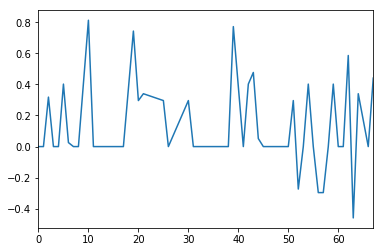

In [19]:
apple_df['sentiment_score'][:50].plot()

In [20]:
apple_df['date']=pd.to_datetime(apple_df['date'])

In [21]:

apple_df['date']=[dt.date() for dt in apple_df['date']]

In [22]:
grouped_date=apple_df.groupby(['date'])

In [23]:
sent_score=grouped_date['sentiment_score'].mean()

In [24]:
sent_score=sent_score.to_frame()


In [25]:
sent_score['date']=sent_score.index

Text(0.5, 1.0, 'Daily Twitter Sentiment for Apple')

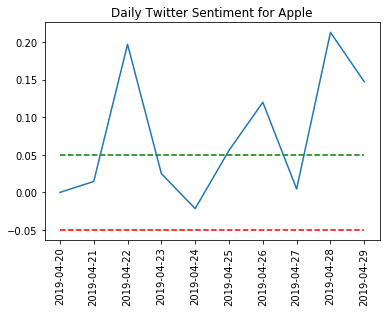

In [27]:
#horizontal line to hilight thresholds for sentiment scores 
plt.plot(sent_score['date'],sent_score['sentiment_score'])
plt.xticks(rotation=90)
plt.hlines(y=0.05,xmin=min(sent_score['date']),xmax=max(sent_score['date']), linestyles='dashed',label='Positive Sentiment',color='g')
plt.hlines(y=-0.05,xmin=min(sent_score['date']),xmax=max(sent_score['date']), linestyles='dashed',label='Positive Sentiment',color='r')
plt.title("Daily Twitter Sentiment for Apple")

In [28]:
sent_score

,sentiment_score,date
date,,
2019-04-20,0.000000,2019-04-20
2019-04-21,0.014564,2019-04-21
2019-04-22,0.196920,2019-04-22
2019-04-23,0.024964,2019-04-23
2019-04-24,-0.021477,2019-04-24
2019-04-25,0.055897,2019-04-25
2019-04-26,0.119810,2019-04-26
2019-04-27,0.004560,2019-04-27
2019-04-28,0.212738,2019-04-28


In [29]:
import json
import requests
import pandas as pd

In [30]:
#helper function to get stock data for a stock
def get_stock(stock):
    #url for the API to get stock
   
    try:
        url="https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={:s}&outputsize=full&apikey= 8BH1V7HU7A5NPI12".format(stock)
        response = requests.get(url)
        jsondata=json.loads(response.text)
        df=pd.DataFrame(jsondata['Time Series (Daily)'])
        df=df.transpose()
        df.index.name = 'date'
        df.reset_index(inplace=True)
        df['Company_Symbol']=stock
        df.columns=['date','open','high','low','close','volume','company symbol']

    except KeyError:
        print("Key error")
    return df
    

In [33]:
#formating 
apple_stock=get_stock('AAPL')

In [34]:
apple_stock=apple_stock[0:7]

In [35]:
sent_score['date']=pd.to_datetime(sent_score['date'])

In [36]:
apple_stock['date']=pd.to_datetime(apple_stock['date'])

In [37]:
sent_score = sent_score.reset_index(drop=True)

In [38]:
sent_score=sent_score.drop(0)

In [39]:
sent_score['close']=apple_stock['close']

In [40]:
sent_score=sent_score.drop(['close'],axis=1)

In [41]:
apple_sent_close=pd.merge(sent_score,apple_stock,on='date',how='inner')

In [42]:
apple_sent_close['close']=pd.to_numeric(apple_sent_close['close'])
apple_sent_close['sentiment_score']=pd.to_numeric(apple_sent_close['sentiment_score'])


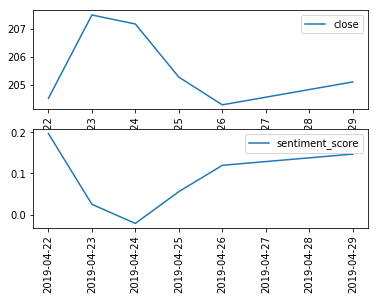

In [43]:
#plot the sentiment corresponding to the date 
plt.subplot(2, 1, 1)
plt.plot(apple_sent_close['date'],apple_sent_close['close'])
plt.xticks(rotation=90)
plt.legend()

plt.subplot(2, 1, 2)

plt.plot(apple_sent_close['date'],apple_sent_close['sentiment_score'])
plt.legend()

plt.xticks(rotation=90)
plt.show()

In [44]:
apple_sent_close

,sentiment_score,date,open,high,low,close,volume,company symbol
0,0.196920,2019-04-22,202.8300,204.9400,202.3400,204.5300,19439545,AAPL
1,0.024964,2019-04-23,204.4300,207.7500,203.9000,207.4800,23322991,AAPL
2,-0.021477,2019-04-24,207.3600,208.4800,207.0500,207.1600,17540609,AAPL
3,0.055897,2019-04-25,206.8300,207.7600,205.1200,205.2800,18543206,AAPL
4,0.119810,2019-04-26,204.9000,205.0000,202.1200,204.3000,18611948,AAPL
5,0.147062,2019-04-29,204.4000,205.9700,203.8600,205.1105,12400824,AAPL


In [59]:
#Function to get the sentiment and map it to close price for any stock
def stock_sentiment(stock):
    #get the data for a stock
    stock_df=get_stock(stock)
    #get tweets 
    stock_tweets=simple_search(api=api,query='#{:s}'.format(stock))
    #get_sentiment
    stock_tweet_df=get_tweet_df(stock_tweets)
    stock_df['date']=pd.to_datetime(stock_df['date'])
    stock_tweet_df['date']=pd.to_datetime(stock_tweet_df['date'])
    stock_tweet_df['date']=[dt.date() for dt in stock_tweet_df['date']]
    stock_df['date']=[dt.date() for dt in stock_df['date']]
    #merge sentiment and stock price tweets o date 
    merged=pd.merge(stock_df,stock_tweet_df,on='date',how='inner')
    merged['close']=pd.to_numeric(merged['close'])
    #groupby date 
    grouped_date=merged.groupby(['date'])
    #get daily average sentiment score 
    sent_score_close=grouped_date['sentiment_score','close'].mean()
    sent_score_close=sent_score_close.reset_index()
    #plot against close
    plt.subplot(3, 3, 1)
    plt.title('Effect of sentiment on {:s}'.format(stock))
    plt.plot(sent_score_close['date'],sent_score_close['close'])
    plt.xticks(rotation=90)
    plt.legend()

    plt.subplot(3, 3, 2)

    plt.plot(sent_score_close['date'],sent_score_close['sentiment_score'])
    plt.legend()

    plt.xticks(rotation=90)
    
    plt.subplot(3,3,3)
    merged['sentiment'].value_counts().plot.bar()
    plt.show()
    
    
    
    
    

C:\Users\mihir\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: generator 'limit_handled' raised StopIteration
  """


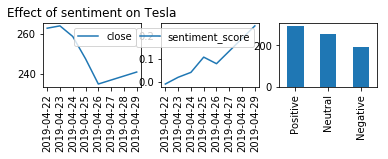

In [56]:
#get the close price , raw sentiment and sentiment scores for corresponding dates 
tesla=stock_sentiment('TSLA')

C:\Users\mihir\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: generator 'limit_handled' raised StopIteration
  """


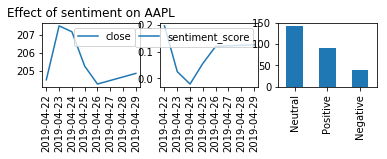

In [60]:
stock_sentiment('AAPL')